# Lab | Random Forests

<br>

For this lab, you will be using the CSV files provided in the files_for_lab folder.
Instructions

   - Apply the Random Forests algorithm but this time only by upscaling the data using SMOTE.
   - Note that since SMOTE works on numerical data only, we will first encode the categorical variables in this case.


<br> 

# 1. Import Dependecies & Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
categorical = pd.read_csv("files_for_lab/categorical.csv")
numerical = pd.read_csv("files_for_lab/numerical.csv")
target = pd.read_csv("files_for_lab/target.csv")

categorical.head(), numerical.head(), target.head()

(  STATE  CLUSTER HOMEOWNR GENDER  DATASRCE RFA_2R RFA_2A GEOCODE2 DOMAIN_A  \
 0    IL       36        H      F         3      L      E        C        T   
 1    CA       14        H      M         3      L      G        A        S   
 2    NC       43        U      M         3      L      E        C        R   
 3    CA       44        U      F         3      L      E        C        R   
 4    FL       16        H      F         3      L      F        A        S   
 
    DOMAIN_B  ...  DOB_YR  DOB_MM  MINRDATE_YR  MINRDATE_MM  MAXRDATE_YR  \
 0         2  ...      37      12           92            8           94   
 1         1  ...      52       2           93           10           95   
 2         2  ...       0       2           91           11           92   
 3         2  ...      28       1           87           11           94   
 4         2  ...      20       1           93           10           96   
 
    MAXRDATE_MM  LASTDATE_YR  LASTDATE_MM  FIRSTDATE_YR  FIRSTDATE

# 2. Data Exploration

In [3]:
# let's start with the categorical data

categorical

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,...,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,IL,36,H,F,3,L,E,C,T,2,...,37,12,92,8,94,2,95,12,89,11
1,CA,14,H,M,3,L,G,A,S,1,...,52,2,93,10,95,12,95,12,93,10
2,NC,43,U,M,3,L,E,C,R,2,...,0,2,91,11,92,7,95,12,90,1
3,CA,44,U,F,3,L,E,C,R,2,...,28,1,87,11,94,11,95,12,87,2
4,FL,16,H,F,3,L,F,A,S,2,...,20,1,93,10,96,1,96,1,79,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,other,27,H,M,3,L,G,C,C,2,...,0,2,96,2,96,2,96,2,96,2
95408,TX,24,H,M,3,L,F,A,C,1,...,50,1,96,3,96,3,96,3,96,3
95409,MI,30,H,M,3,L,E,B,C,3,...,38,1,96,3,95,1,96,10,94,10
95410,CA,24,H,F,2,L,F,A,C,1,...,40,5,90,11,96,8,97,1,86,12


In [4]:
categorical.info()

# we see here that although we have 22 features that have been labeled as categorical, 
#many of them don't require encoding as they are int already.
# we're exploring next the features that require encoding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   STATE         95412 non-null  object
 1   CLUSTER       95412 non-null  int64 
 2   HOMEOWNR      95412 non-null  object
 3   GENDER        95412 non-null  object
 4   DATASRCE      95412 non-null  int64 
 5   RFA_2R        95412 non-null  object
 6   RFA_2A        95412 non-null  object
 7   GEOCODE2      95412 non-null  object
 8   DOMAIN_A      95412 non-null  object
 9   DOMAIN_B      95412 non-null  int64 
 10  ODATEW_YR     95412 non-null  int64 
 11  ODATEW_MM     95412 non-null  int64 
 12  DOB_YR        95412 non-null  int64 
 13  DOB_MM        95412 non-null  int64 
 14  MINRDATE_YR   95412 non-null  int64 
 15  MINRDATE_MM   95412 non-null  int64 
 16  MAXRDATE_YR   95412 non-null  int64 
 17  MAXRDATE_MM   95412 non-null  int64 
 18  LASTDATE_YR   95412 non-null  int64 
 19  LAST

In [5]:
categorical.STATE.value_counts()
# this seems ok to be encoded

other    30457
CA       17343
FL        8376
TX        7535
IL        6420
MI        5654
NC        4160
WA        3577
GA        3403
IN        2980
WI        2795
MO        2712
Name: STATE, dtype: int64

In [6]:
categorical.HOMEOWNR.value_counts()
# this seems ok to be encoded

H    74582
U    20830
Name: HOMEOWNR, dtype: int64

In [7]:
categorical.GENDER.value_counts()
# this seems ok to be encoded

F        54234
M        39094
other     2084
Name: GENDER, dtype: int64

In [8]:
categorical.RFA_2R.value_counts()
# we can drop this columns as all rows have the same value. Our model wont benefit from this

L    95412
Name: RFA_2R, dtype: int64

In [9]:
categorical.RFA_2A.value_counts()
# this seems ok to be encoded

F    46964
E    21639
G    19397
D     7412
Name: RFA_2A, dtype: int64

In [10]:
categorical.GEOCODE2.value_counts()
# this seems ok to be encoded

A    34803
B    28505
D    16580
C    15524
Name: GEOCODE2, dtype: int64

In [11]:
categorical.DOMAIN_A.value_counts()
# this seems ok to be encoded

R    22106
S    21924
C    19689
T    19527
U    12166
Name: DOMAIN_A, dtype: int64

In [12]:
# let's have a look at our target variable
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TARGET_B  95412 non-null  int64  
 1   TARGET_D  95412 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.5 MB


In [13]:
target
# it seems that target_b is what we need for our classfication. 
# Target_d could to be an elaborate score of the target_b 
# for our classification model we'll use target_b

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
95407,0,0.0
95408,0,0.0
95409,0,0.0
95410,1,18.0


In [14]:
# check imbalance of target variable
target['TARGET_B'].value_counts(normalize=True)

0    0.949241
1    0.050759
Name: TARGET_B, dtype: float64

In [15]:
# the target variable is highly imbalanced, something we need to keep in mind for later

In [16]:
# let's have a quick look at our numerical variables too
numerical

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.000000,5,9,0,0,39,34,18,10,...,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.000000,6,9,16,0,15,55,11,6,...,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,1,61.611649,3,1,2,0,20,29,33,6,...,14,2.0,16.0,5.0,12,7.481481,15078,1,4,60
3,0,70.000000,1,4,2,0,23,14,31,3,...,7,2.0,11.0,10.0,9,6.812500,172556,1,4,41
4,0,78.000000,3,2,60,1,28,9,53,26,...,8,3.0,15.0,15.0,14,6.864865,7112,1,2,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1,61.611649,5,9,0,14,36,47,11,7,...,0,25.0,25.0,25.0,9,25.000000,184568,0,1,12
95408,1,48.000000,7,9,1,0,31,43,19,4,...,0,20.0,20.0,20.0,9,20.000000,122706,1,1,2
95409,1,60.000000,5,9,0,0,18,46,20,7,...,4,3.0,10.0,10.0,3,8.285714,189641,1,3,34
95410,0,58.000000,7,9,0,0,28,35,20,9,...,18,5.0,21.0,18.0,4,12.146341,4693,1,4,11


In [17]:
numerical.isna().sum()
# all seems to look good for our numerical features

TCODE       0
AGE         0
INCOME      0
WEALTH1     0
HIT         0
           ..
AVGGIFT     0
CONTROLN    0
HPHONE_D    0
RFA_2F      0
CLUSTER2    0
Length: 315, dtype: int64

# 3. Data Cleaning & Preprocessing

In [18]:
# let's start with the target variable

target = target.drop(['TARGET_D'], axis = 1)

In [19]:
target # sanity check

,TARGET_B
0,0
1,0
2,0
3,0
4,0
...,...
95407,0
95408,0
95409,0
95410,1


In [20]:
# then let's clean and  categorical variables
categorical = categorical.drop(['RFA_2R'], axis = 1)

In [21]:
categorical.info() #sanity check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   STATE         95412 non-null  object
 1   CLUSTER       95412 non-null  int64 
 2   HOMEOWNR      95412 non-null  object
 3   GENDER        95412 non-null  object
 4   DATASRCE      95412 non-null  int64 
 5   RFA_2A        95412 non-null  object
 6   GEOCODE2      95412 non-null  object
 7   DOMAIN_A      95412 non-null  object
 8   DOMAIN_B      95412 non-null  int64 
 9   ODATEW_YR     95412 non-null  int64 
 10  ODATEW_MM     95412 non-null  int64 
 11  DOB_YR        95412 non-null  int64 
 12  DOB_MM        95412 non-null  int64 
 13  MINRDATE_YR   95412 non-null  int64 
 14  MINRDATE_MM   95412 non-null  int64 
 15  MAXRDATE_YR   95412 non-null  int64 
 16  MAXRDATE_MM   95412 non-null  int64 
 17  LASTDATE_YR   95412 non-null  int64 
 18  LASTDATE_MM   95412 non-null  int64 
 19  FIRS

In [22]:
# let's concatenate our dataframes

df = pd.concat([numerical,categorical,target], axis = 1)

In [23]:
df.head(5) # sanity check

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B
0,0,60.000000,5,9,0,0,39,34,18,10,...,12,92,8,94,2,95,12,89,11,0
1,1,46.000000,6,9,16,0,15,55,11,6,...,2,93,10,95,12,95,12,93,10,0
2,1,61.611649,3,1,2,0,20,29,33,6,...,2,91,11,92,7,95,12,90,1,0
3,0,70.000000,1,4,2,0,23,14,31,3,...,1,87,11,94,11,95,12,87,2,0
4,0,78.000000,3,2,60,1,28,9,53,26,...,1,93,10,96,1,96,1,79,3,0


In [24]:
# X-y split
X = df.drop(['TARGET_B'],axis = 1)
y = pd.DataFrame(data=df, columns=['TARGET_B'])

In [25]:
X = pd.get_dummies(X, drop_first = True)

In [26]:
#Train Test Split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, shuffle = True, stratify = y)

# 4. Modeling

In [27]:
# since we have seen above that the data is completely imbalanced (95%/5%) we'll directly implement oversampling techniques

Best accuracy:  0.9492218204684798  at K  6


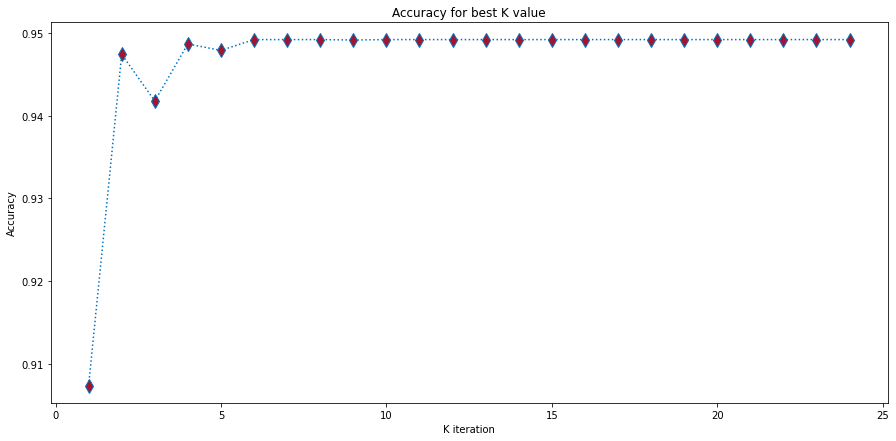

In [28]:
# since we're trying to improve the scores we have already it makes sense to find the best k_neighbor value for SMOTE.
# we'll use a kneighbor classifier to do that

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracy = []

for neighbor in range(1,25):
    knn= KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    
    
plt.figure(figsize=(15,7))
plt.plot(range(1,25), accuracy, color="#0072BD", linestyle="dotted",
         marker = "d", markerfacecolor="#A2142F", markersize=10)
plt.title("Accuracy for best K value")
plt.xlabel("K iteration")
plt.ylabel("Accuracy")
print("Best accuracy: ", max(accuracy), " at K ", accuracy.index(max(accuracy))+1)

In [29]:
# implementing SMOTE and calling the classifier

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

smote = SMOTE(k_neighbors = 6)
X_train_SMOTE,y_train_SMOTE = smote.fit_resample(X_train, y_train)

rfc = RandomForestClassifier(random_state = 42)

In [32]:
# function 
from sklearn.metrics import classification_report

def model(classifier, X_train, X_test, y_train, y_test):
    classifier.fit(X_train,y_train)
    pred_train = classifier.predict(X_train)
    pred_test = classifier.predict(X_test)
    print(classification_report(y_test, pred_test))

In [33]:
# let's compare the baseline model...

model(rfc, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     18114
           1       0.00      0.00      0.00       969

    accuracy                           0.95     19083
   macro avg       0.47      0.50      0.49     19083
weighted avg       0.90      0.95      0.92     19083



In [34]:
#... with the balanced data
model(rfc, X_train_SMOTE, X_test, y_train_SMOTE, y_test)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     18114
           1       0.04      0.00      0.00       969

    accuracy                           0.95     19083
   macro avg       0.50      0.50      0.49     19083
weighted avg       0.90      0.95      0.92     19083



# 5. Conclusion

1. Our baseline model scored 95% accuracy but that is completely attributed to class 0 since it has not learned class 1 almost at all. We see that if the imbalance isn't addressed this actually is a really bad model.
2. Oversampling unfortunately doesn't seem to fix this issue either since it produces very comparable results. 
3. Next potential steps here would be to approach the imbalance of the data with different ways: either other oversampling techniques, undersampling techniques or even class weights. Another solution would be to further dive into the data and understand what our features really stand for. This kind of understanding would help us make further decisions.
